In [1]:
import pandas as pd
import numpy as np

In [2]:
# load the data set
data = pd.read_excel( "TData.xlsx" ) # spend on advertising

In [3]:
data.head(5)

,LTE_UE_RSRP,LTE_UE_RSRQ,LTE_UE_SINR,LTE_UE_RB_Num_DL
0,112.300003,12.2,1.3,9.0
1,112.300003,12.2,1.3,9.0
2,112.199997,13.1,1.6,9.0
3,111.699997,13.1,1.4,9.0
4,113.599998,13.9,1.9,9.0


In [4]:
data.shape

(9640, 4)

In [29]:
import pandas_profiling

In [30]:
pandas_profiling.ProfileReport(data)

Number of variables,4
Number of observations,9640
Total Missing (%),0.0%
Total size in memory,301.3 KiB
Average record size in memory,32.0 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 4 columns):
LTE_UE_RSRP         9640 non-null float64
LTE_UE_RSRQ         9640 non-null float64
LTE_UE_SINR         9640 non-null float64
LTE_UE_RB_Num_DL    9640 non-null float64
dtypes: float64(4)
memory usage: 301.3 KB


In [15]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])
data.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
LTE_UE_RSRP,9640.0,0.0,871289.603135,90.382739,91.400002,10.605707,112.481012,66.839002,66.862792,72.699997,76.0,82.599998,91.400002,96.900002,104.0,108.704997,115.000000,115.000000
LTE_UE_RSRQ,9640.0,0.0,94217.040025,9.773552,9.400000,3.101185,9.617346,4.900000,4.900000,5.600000,6.0,7.200000,9.400000,11.700000,14.0,16.000000,18.000000,18.000000
LTE_UE_SINR,9640.0,0.0,91969.077048,9.540361,8.100000,6.962169,48.471792,0.000000,0.000000,0.700000,1.3,3.300000,8.100000,15.000000,19.5,21.900000,26.637211,26.661001
LTE_UE_RB_Num_DL,9640.0,0.0,172786.399998,17.923900,9.000000,20.990213,440.589060,1.000000,1.000000,1.300000,2.0,3.000000,9.000000,24.000000,50.0,75.000000,75.000000,75.000000


In [12]:
var_summary(data.LTE_UE_RSRP)

N           9640.000000
NMISS          0.000000
SUM       871333.119894
MEAN          90.387253
MEDIAN        91.400002
STD           10.777122
VAR          116.146348
MIN           58.400002
P1            66.839002
P5            72.699997
P10           76.000000
P25           82.599998
P50           91.400002
P75           96.900002
P90          104.000000
P95          108.704997
P99          115.000000
MAX          128.100006
dtype: float64

In [13]:
data.columns

Index(['LTE_UE_RSRP', 'LTE_UE_RSRQ', 'LTE_UE_SINR', 'LTE_UE_RB_Num_DL'], dtype='object')

In [14]:
#Handling Outliers
for i in data[['LTE_UE_RSRP', 'LTE_UE_RSRQ', 'LTE_UE_SINR', 'LTE_UE_RB_Num_DL']]:
    data[i]= data[i].clip_upper(data[i].quantile(0.99)) 
    data[i]= data[i].clip_lower(data[i].quantile(0.01)) 
# Fill with mean
    data[i]=data[i].fillna(data[i].mean()) # Null value for mean

C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gaura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [16]:
# exploring data
# Distribution of variables
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

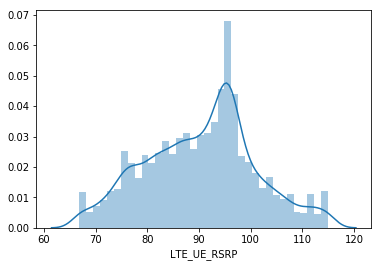

In [17]:
sns.distplot(data.LTE_UE_RSRP)

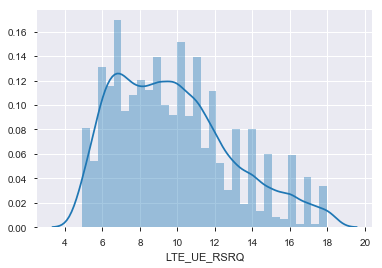

In [40]:
sns.distplot(data.LTE_UE_RSRQ)

### Notes:
>RSRP seems to be normal distribution. BUT RSRQ is skewed

In [41]:
data.columns

Index(['LTE_UE_RSRP', 'LTE_UE_RSRQ', 'LTE_UE_SINR', 'LTE_UE_RB_Num_DL'], dtype='object')

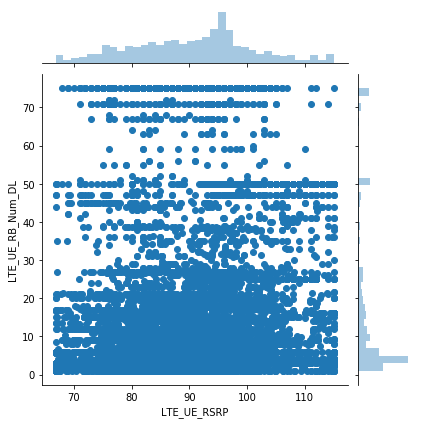

In [18]:
#Is there a relationship between RSRP and RB

sns.jointplot(data.LTE_UE_RSRP, data.LTE_UE_RB_Num_DL)

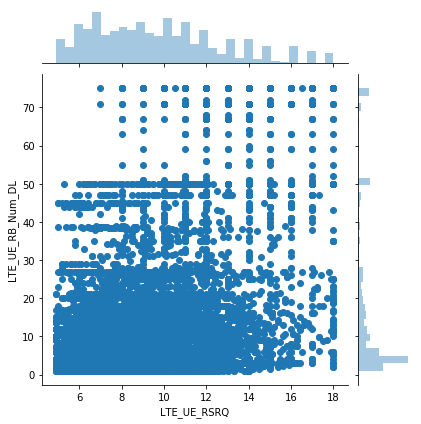

In [19]:
#Sales Vs. TV advertisement spends
sns.jointplot(data.LTE_UE_RSRQ, data.LTE_UE_RB_Num_DL)

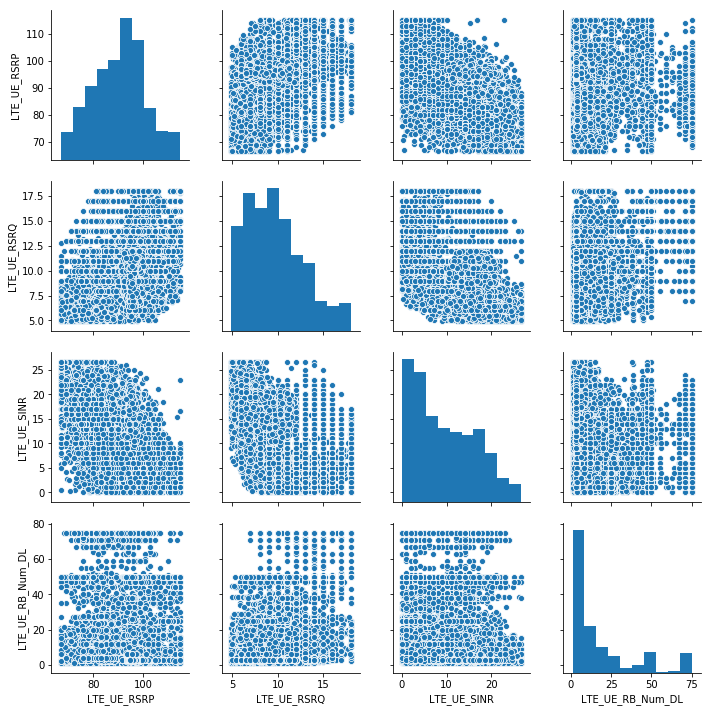

In [20]:
# Visualizing pairwise correleation
sns.pairplot(data)

In [45]:
data.corr()

,LTE_UE_RSRP,LTE_UE_RSRQ,LTE_UE_SINR,LTE_UE_RB_Num_DL
LTE_UE_RSRP,1.000000,0.533853,-0.424408,0.157017
LTE_UE_RSRQ,0.533853,1.000000,-0.479561,0.519120
LTE_UE_SINR,-0.424408,-0.479561,1.000000,-0.100953
LTE_UE_RB_Num_DL,0.157017,0.519120,-0.100953,1.000000


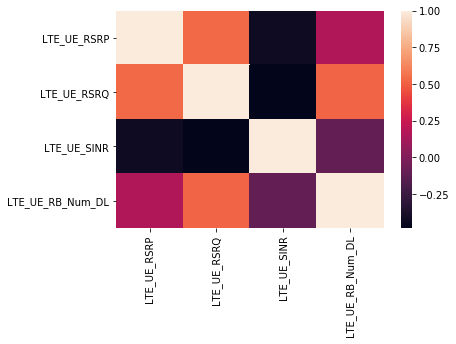

In [21]:
# Visualizing the correlations
#The darker is the color, the stronger is the correlation
sns.heatmap( data.corr() )

### NOTES:
> The diagonal of the above matirx shows the auto-correlation of the variables. 

### Building Regression Model
> Linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression <br>
> A simple linear regression model is given by Y=mX+b <br>
> where m is the slope and b is the y-intercept. Y is the dependent variable and X is the explanatory variable. <br>
> Very briefly and simplistically, Linear Regression is a class of techniques for fitting a straight line to a set of data points

In [24]:
import statsmodels.formula.api as smf

In [22]:
data.columns

Index(['LTE_UE_RSRP', 'LTE_UE_RSRQ', 'LTE_UE_SINR', 'LTE_UE_RB_Num_DL'], dtype='object')

In [25]:
lm=smf.ols('LTE_UE_RB_Num_DL~LTE_UE_RSRP+LTE_UE_RSRQ+LTE_UE_SINR',data).fit()

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LTE_UE_RB_Num_DL   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     1438.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:35:17   Log-Likelihood:                -41239.
No. Observations:                9640   AIC:                         8.249e+04
Df Residuals:                    9636   BIC:                         8.252e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.7549      1.812     -4.279      0.000     -11.307      -4.202
LTE_UE_RSRP    -0.2561      0.020    -12.585      0.000      -0.296      -0.216
LTE_UE_RSRQ     4.5131      0.072     62.854      0.000       4.372       4.654
LTE_UE_SINR     0.4941      0.030     16.542      0.000       0.436       0.553
==============================================================================
Omnibus:                      801.198   Durbin-Watson:                   0.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.353
Skew:                           0.749   Prob(JB):                    9.97e-223
Kurtosis:                       3.550   Cond. No.                         938.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
lm=smf.ols('LTE_UE_RB_Num_DL~LTE_UE_RSRQ+LTE_UE_SINR',data).fit()

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LTE_UE_RB_Num_DL   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     2045.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:45:41   Log-Likelihood:                -41318.
No. Observations:                9640   AIC:                         8.264e+04
Df Residuals:                    9637   BIC:                         8.266e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -28.0415      0.835    -33.587      0.000     -29.678     -26.405
LTE_UE_RSRQ     4.1374      0.066     62.845      0.000       4.008       4.267
LTE_UE_SINR     0.5794      0.029     19.758      0.000       0.522       0.637
==============================================================================
Omnibus:                      914.946   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1209.598
Skew:                           0.807   Prob(JB):                    2.18e-263
Kurtosis:                       3.640   Cond. No.                         67.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Getting the f value
lm.f_pvalue

0.0

In [30]:
# Getting model parameters
lm.params

Intercept     -28.041509
LTE_UE_RSRQ     4.137449
LTE_UE_SINR     0.579416
dtype: float64

In [31]:
# Verifying parameter significance
lm.pvalues

Intercept      5.604231e-234
LTE_UE_RSRQ     0.000000e+00
LTE_UE_SINR     3.266080e-85
dtype: float64

### Evaluating Model Accuracy
> R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
> R-square signifies percentage of variations in the reponse variable that can be explained by the model. <br>
> R-squared = Explained variation / Total variation <br>
> Total variation is variation of response variable around it's mean. <br>
> R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
> while 100% signifies that the model explains all the variability of the response. <br>
> The closer the r-square to 100%, the better is the model. <br>

In [32]:
lm.rsquared

0.29792621382061335

In [33]:
round( float( lm.rsquared ), 2 )

0.3

### USING sklearn Library to build the model
> sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
# Splitting into Train and test data sets
# Typically the model should be built on a training dataset and validated against a test dataset
# Let's split the dataset into 70/30 ratio. 70% belongs to training and 30% belongs to test.

from sklearn.model_selection import train_test_split

In [36]:
data.columns

Index(['LTE_UE_RSRP', 'LTE_UE_RSRQ', 'LTE_UE_SINR', 'LTE_UE_RB_Num_DL'], dtype='object')

In [38]:
X_train, X_test, y_train, y_test = train_test_split( data[['LTE_UE_RSRP', 'LTE_UE_RSRQ', 'LTE_UE_SINR']],
  data.LTE_UE_RB_Num_DL,  test_size=0.3,  random_state = 42 )

In [39]:
len( X_train ),len( X_test)

(6748, 2892)

In [41]:
## Building the model with train set and make predictions on test set
linreg = LinearRegression()
linreg.fit( X_train, y_train )
y_pred = linreg.predict(X_test)

In [42]:
linreg.coef_

array([-0.23906109,  4.45336221,  0.47781501])

In [43]:
from sklearn import metrics
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) )
rmse

17.310852108129406

In [44]:
y_pred_t = linreg.predict(X_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_t) )
rmse_t

17.50274019487133

In [45]:
metrics.r2_score( y_train, y_pred_t )

0.30209674206943926

In [46]:
metrics.r2_score( y_test, y_pred )

0.3252374316885176

In [47]:
list( zip( ['LTE_UE_RSRP', 'LTE_UE_RSRQ', 'LTE_UE_SINR'], list( linreg.coef_ ) ) )

[('LTE_UE_RSRP', -0.23906109306801654),
 ('LTE_UE_RSRQ', 4.4533622130029125),
 ('LTE_UE_SINR', 0.4778150084698136)]

In [48]:
residuals = y_test - y_pred

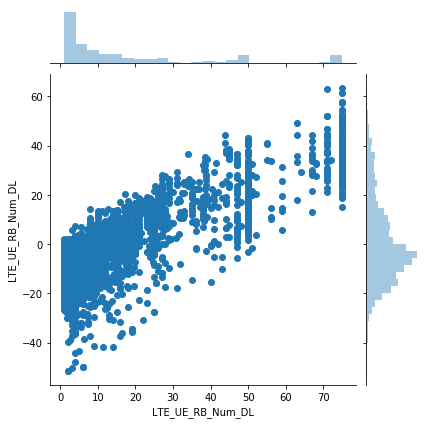

In [49]:
sns.jointplot(y_test, residuals )

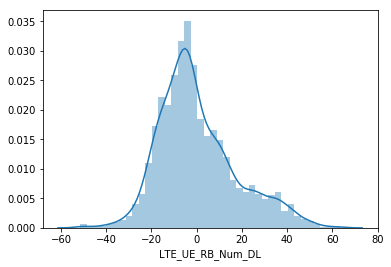

In [50]:
sns.distplot( residuals )

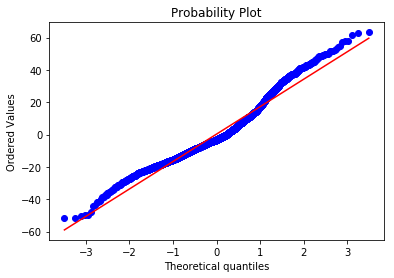

In [51]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

In [52]:
### K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [53]:
linreg = LinearRegression()

In [54]:
cross_val_score( linreg, X_train, y_train, scoring = 'r2', cv = 10 )

array([0.31540698, 0.27048519, 0.29103739, 0.32471937, 0.32229394,
       0.32100837, 0.32712819, 0.26233734, 0.29297484, 0.27669354])

In [55]:
round( np.mean( cross_val_score( linreg,
                              X_train,
                              y_train,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

0.3

In [56]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [57]:
F_values, p_values  = f_regression(  X_train, y_train )

In [58]:
F_values

array([ 185.88875045, 2446.81865568,   81.73759739])

In [59]:
['%.3f' % p for p in p_values]

['0.000', '0.000', '0.000']

As p - values are less than 5% - the variables are siginificant in the regression equation.

In [60]:
### Exporting and importing the model
import pickle

In [61]:
from sklearn.externals import joblib
joblib.dump(linreg, 'lin_model.pkl', compress=9)

['lin_model.pkl']

In [62]:
model_clone = joblib.load('lin_model.pkl')